# Loading the data

In [108]:
import pandas as pd

df = pd.read_csv("Chronic_Kidney_Disease_data.csv")

df.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,DietQuality,...,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
0,1,71,0,0,0,2,31.069414,1,5.128112,0.240386,...,4.518513,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1
1,2,34,0,0,1,3,29.692119,1,18.609552,6.503233,...,2.202222,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1
2,3,80,1,1,0,1,37.394822,1,11.882429,2.104828,...,5.967271,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1
3,4,40,0,2,0,1,31.329680,0,16.020165,6.964422,...,2.176387,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1
4,5,43,0,1,1,2,23.726311,0,7.944146,3.097796,...,6.800993,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1


Function to calculate CKD Stages

In [109]:
def classify_ckd_stage(gfr):
    if gfr >= 90:
        return 1
    elif 60 <= gfr < 90:
        return 2
    elif 45 <= gfr < 60:
        return 3
    elif 30 <= gfr < 45:
        return 3
    elif 15 <= gfr < 30:
        return 4
    else:
        return 5
    
df['CKD_Stage'] = df['GFR'].apply(classify_ckd_stage)

df = df[[col for col in df.columns if col != 'CKD_Stage'] + ['CKD_Stage']]

df.to_csv('updated_CKD_data.csv', index=False)

print(df.head())


   PatientID  Age  Gender  Ethnicity  SocioeconomicStatus  EducationLevel  \
0          1   71       0          0                    0               2   
1          2   34       0          0                    1               3   
2          3   80       1          1                    0               1   
3          4   40       0          2                    0               1   
4          5   43       0          1                    1               2   

         BMI  Smoking  AlcoholConsumption  DietQuality  ...   Itching  \
0  31.069414        1            5.128112     0.240386  ...  7.556302   
1  29.692119        1           18.609552     6.503233  ...  6.836766   
2  37.394822        1           11.882429     2.104828  ...  2.144722   
3  31.329680        0           16.020165     6.964422  ...  7.077188   
4  23.726311        0            7.944146     3.097796  ...  3.553118   

   QualityOfLifeScore  HeavyMetalsExposure  OccupationalExposureChemicals  \
0           76.076800

# Data Preprocessing

In [110]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [111]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   DietQuality                    1659 non-null   float64
 10  SleepQuality                   1659 non-null   float64
 11  FamilyHistoryKidneyDisease     1659 non-null   int64  
 12  FamilyHistoryHypertension      1659 non-null   i

### One-hot Encoding for ethnicity

The `Ethnicity` column in our dataset is currently represented as numerical categories (0: Caucasian, 1: African American, 2: Asian, 3: Other). Since machine learning models typically perform better with numerical representations that avoid implicit ordering, we apply **one-hot encoding** to transform this column into separate binary variables.

After encoding, four new columns will be created:
- `Ethnicity_Caucasian`: 1 if the patient is Caucasian, otherwise 0.
- `Ethnicity_AfricanAmerican`: 1 if the patient is African American, otherwise 0.
- `Ethnicity_Asian`: 1 if the patient is Asian, otherwise 0.
- `Ethnicity_Other`: 1 if the patient belongs to another ethnicity, otherwise 0.

This transformation ensures that the model does not infer any ordinal relationship between different ethnicities.


In [114]:
df_encoded1 = pd.get_dummies(df, columns=['Ethnicity'], prefix='Ethnicity').astype(int)

# Rename columns
df_encoded1 = df_encoded1.rename(columns={
    'Ethnicity_0': 'Ethnicity_Caucasian',
    'Ethnicity_1': 'Ethnicity_AfricanAmerican',
    'Ethnicity_2': 'Ethnicity_Asian',
    'Ethnicity_3': 'Ethnicity_Other'
})

# df_encoded1.to_csv("updated_CKD_data1.csv", index=False)

df_encoded1.head()

,PatientID,Age,Gender,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,DietQuality,SleepQuality,...,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,CKD_Stage,Ethnicity_Caucasian,Ethnicity_AfricanAmerican,Ethnicity_Asian,Ethnicity_Other
0,1,71,0,0,2,31,1,5,0,4,...,1,1,4,9,1,3,1,0,0,0
1,2,34,0,1,3,29,1,18,6,7,...,0,3,8,7,1,3,1,0,0,0
2,3,80,1,0,1,37,1,11,2,4,...,1,1,7,7,1,2,0,1,0,0
3,4,40,0,0,1,31,0,16,6,6,...,0,3,3,6,1,3,0,0,1,0
4,5,43,0,1,2,23,0,7,3,4,...,1,0,3,1,1,3,0,1,0,0


### Label Encoding for Education Level

The `EducationLevel` column represents categorical data with an **inherent order**:
- `0`: None  
- `1`: High School  
- `2`: Bachelor's  
- `3`: Higher  

Since education follows a **hierarchical progression**, **label encoding** replaces each category with its corresponding numeric value, preserving order while keeping the dataset compact.  


In [115]:
df_encoded1['EducationLevel']= df_encoded1['EducationLevel'].astype('category')  #Converts the column to a categorical data type

df_encoded1.to_csv("processed_ckd_data.csv", index=False)

### Standardization of Numerical Features  

To ensure that numerical features with different scales contribute equally to the analysis, we apply **standardization**. This transformation rescales the data so that each feature has a mean of 0 and a standard deviation of 1.  


In [116]:
!pip install scikit-learn


In [18]:
from sklearn.preprocessing import StandardScaler

# List of numerical features to normalize
numerical_features = [
    'BMI', 'AlcoholConsumption', 'DietQuality', 'SleepQuality',
    'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c',
    'SerumCreatinine', 'BUNLevels', 'GFR', 'ProteinInUrine', 'ACR',
    'SerumElectrolytesSodium', 'SerumElectrolytesPotassium',
    'SerumElectrolytesCalcium', 'SerumElectrolytesPhosphorus',
    'HemoglobinLevels', 'CholesterolTotal', 'CholesterolLDL',
    'CholesterolHDL', 'CholesterolTriglycerides', 'FatigueLevels',
    'NauseaVomiting', 'MuscleCramps', 'Itching', 'QualityOfLifeScore',
    'MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy'
]

scaler = StandardScaler()

# Fit and transform the numerical columns
df_encoded1[numerical_features] = scaler.fit_transform(df_encoded1[numerical_features])

df.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,DietQuality,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,CKD_Stage
0,1,71,0,0,0,2,31.069414,1,5.128112,0.240386,...,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,3
1,2,34,0,0,1,3,29.692119,1,18.609552,6.503233,...,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,3
2,3,80,1,1,0,1,37.394822,1,11.882429,2.104828,...,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,2
3,4,40,0,2,0,1,31.329680,0,16.020165,6.964422,...,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,3
4,5,43,0,1,1,2,23.726311,0,7.944146,3.097796,...,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,3


In [19]:
df_encoded1.head()

,PatientID,Age,Gender,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,DietQuality,SleepQuality,...,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,CKD_Stage,Ethnicity_Caucasian,Ethnicity_AfricanAmerican,Ethnicity_Asian,Ethnicity_Other
0,1,71,0,0,2,0.530724,1,-0.772817,-1.589311,-1.453632,...,1,-0.457010,-0.156501,1.512877,1,3,1,0,0,0
1,2,34,0,1,3,0.256520,1,1.475577,0.520585,0.332720,...,0,1.352487,1.241262,0.817624,1,3,1,0,0,0
2,3,80,1,0,1,1.353339,1,0.264903,-0.886012,-1.453632,...,1,-0.457010,0.891822,0.817624,1,2,0,1,0,0
3,4,40,0,0,1,0.530724,0,1.129670,0.520585,-0.262730,...,0,1.352487,-0.505941,0.469998,1,3,0,0,1,0
4,5,43,0,1,2,-0.566095,0,-0.426910,-0.534363,-1.453632,...,1,-1.361758,-0.505941,-1.268135,1,3,0,1,0,0


### **Exploratory Data Analysis (EDA) - Distribution of Numerical Variables**  

This is the process of analyzing and summarizing datasets to understand their main characteristics that helps identify patterns, detect outliers and determine relationships between the variables.

To understand the distribution of key numerical variables, we generate histograms. This helps in:  

- Identifying the shape of the data distribution (normal, skewed, etc.).  
- Detecting potential outliers or unusual patterns.  
- Understanding the spread and range of values for each variable.  

The selected variables include Age, BMI, Serum Creatinine, BUN Levels, GFR, and Protein in Urine, as they are critical indicators in CKD analysis.  

The histograms provide a visual representation of the frequency distribution of each variable.


In [20]:
numerical_features_eda = ['Age', 'BMI', 'SerumCreatinine', 'BUNLevels', 'GFR', 'ProteinInUrine']

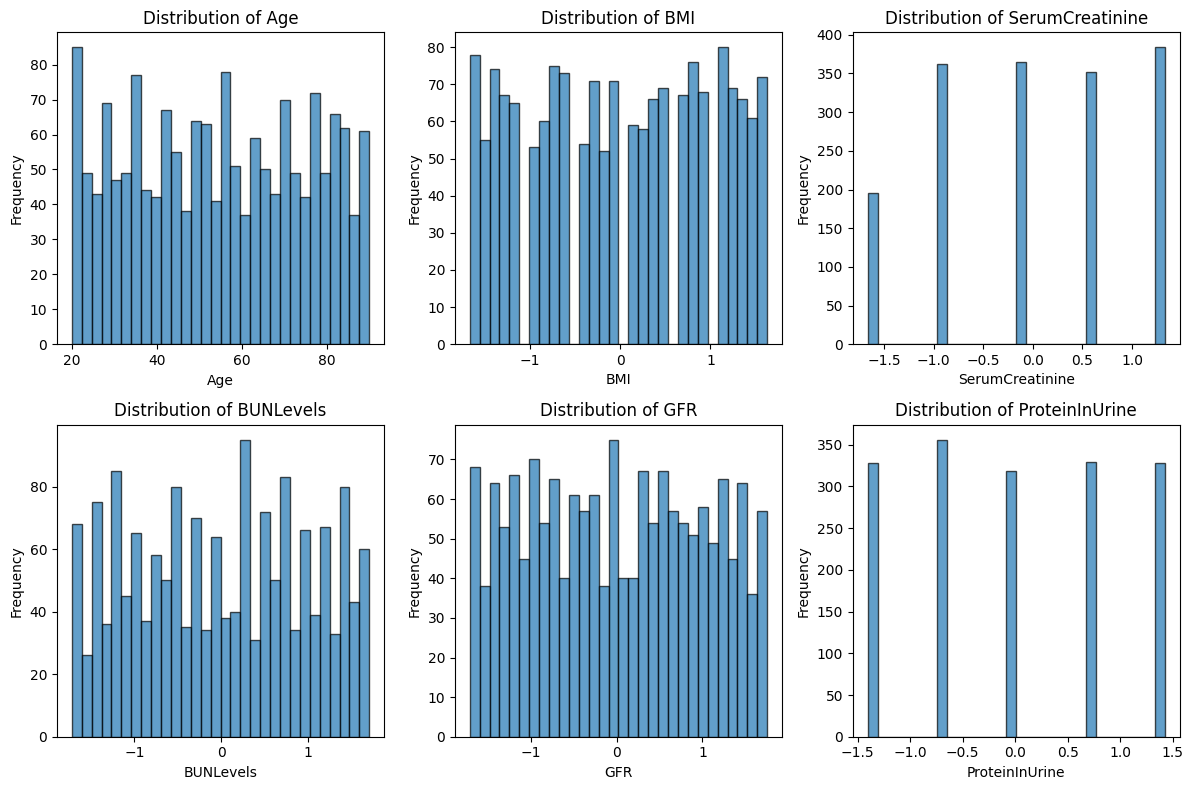

In [23]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features_eda, 1):
    plt.subplot(2, 3, i)
    plt.hist(df_encoded1[col], bins=30, edgecolor='black', alpha=0.7)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [27]:
df_before = pd.read_csv("updated_CKD_data1.csv")

In [28]:
df_before.head()

,PatientID,Age,Gender,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,DietQuality,SleepQuality,...,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,CKD_Stage,Ethnicity_Caucasian,Ethnicity_AfricanAmerican,Ethnicity_Asian,Ethnicity_Other
0,1,71,0,0,2,31,1,5,0,4,...,1,1,4,9,1,3,1,0,0,0
1,2,34,0,1,3,29,1,18,6,7,...,0,3,8,7,1,3,1,0,0,0
2,3,80,1,0,1,37,1,11,2,4,...,1,1,7,7,1,2,0,1,0,0
3,4,40,0,0,1,31,0,16,6,6,...,0,3,3,6,1,3,0,0,1,0
4,5,43,0,1,2,23,0,7,3,4,...,1,0,3,1,1,3,0,1,0,0


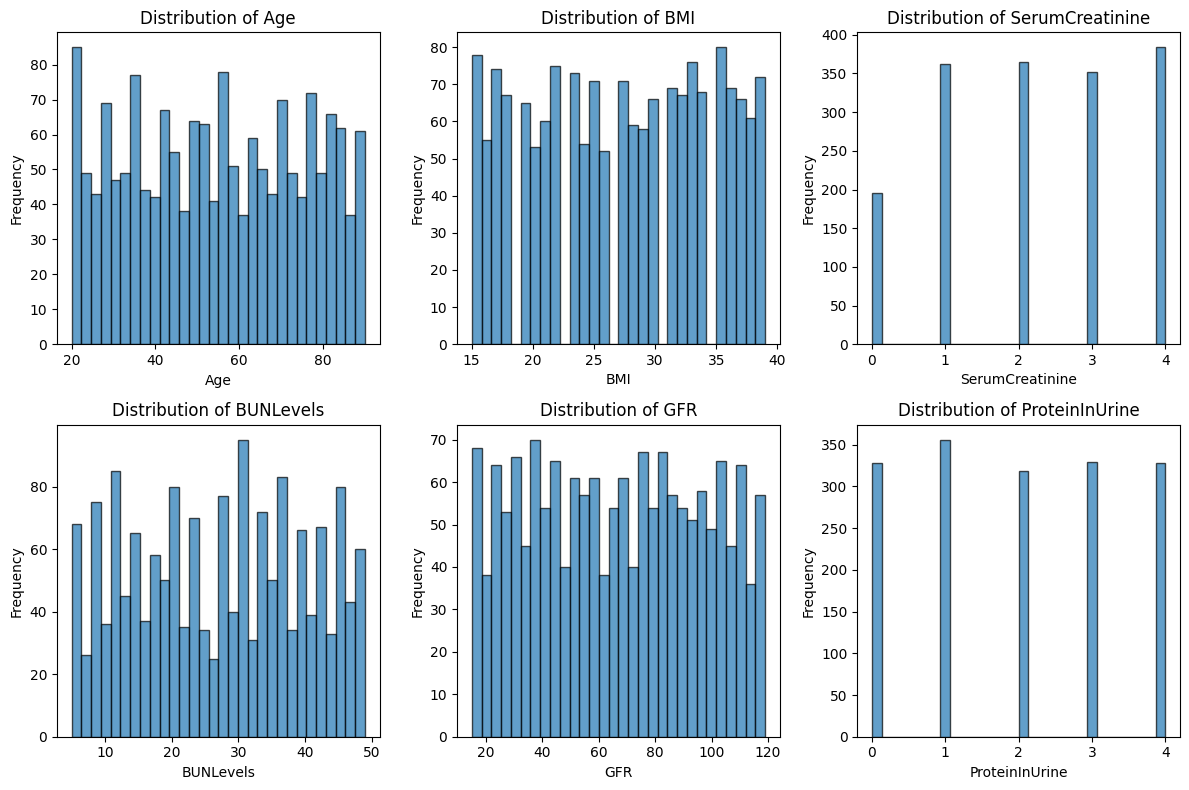

In [29]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features_eda, 1):
    plt.subplot(2, 3, i)
    plt.hist(df_before[col], bins=30, edgecolor='black', alpha=0.7)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

To understand the distribution of key biomarkers, we plotted histograms before and after normalization. The selected biomarkers (GFR, Serum Creatinine, BUN, Protein in Urine, BMI, and Age) are critical indicators of kidney function and CKD progression.

- **GFR (GLomerular Filtration Rate)** - Measures how well the kidneys are filtering blood. Lower GFR indicates kidney damage
- **Serum Creatinine** - Waste product from muscles that is filtered by the kidneys. Increases when kidneys are not filtering well
- **BUN (Blood Urea Nitrogen)** - Measures the amount of nitrogen in urea, a waste product made when the liver breaks down protein. High BUN suggests reduced kidney function.
-  **Protein in Urine** - Healthy kidneys prevent proteins from leaking into urine. If protein is found in urine, it may indicate kidney damage.
- **BMI** - High BMI is linked to higher CKD risk as obesity can increase blood pressure and diabetes risk and low BMI may indicate malnutrition in advanced CKD

After normalization, some values became negative due to Z-score transformation, which centers data around 0 but does not affect the data's distribution but changes its scale. The histograms confirm that normalization preserved the original shape of the data while adjusting the scale for further analysis.

Detecting outliers

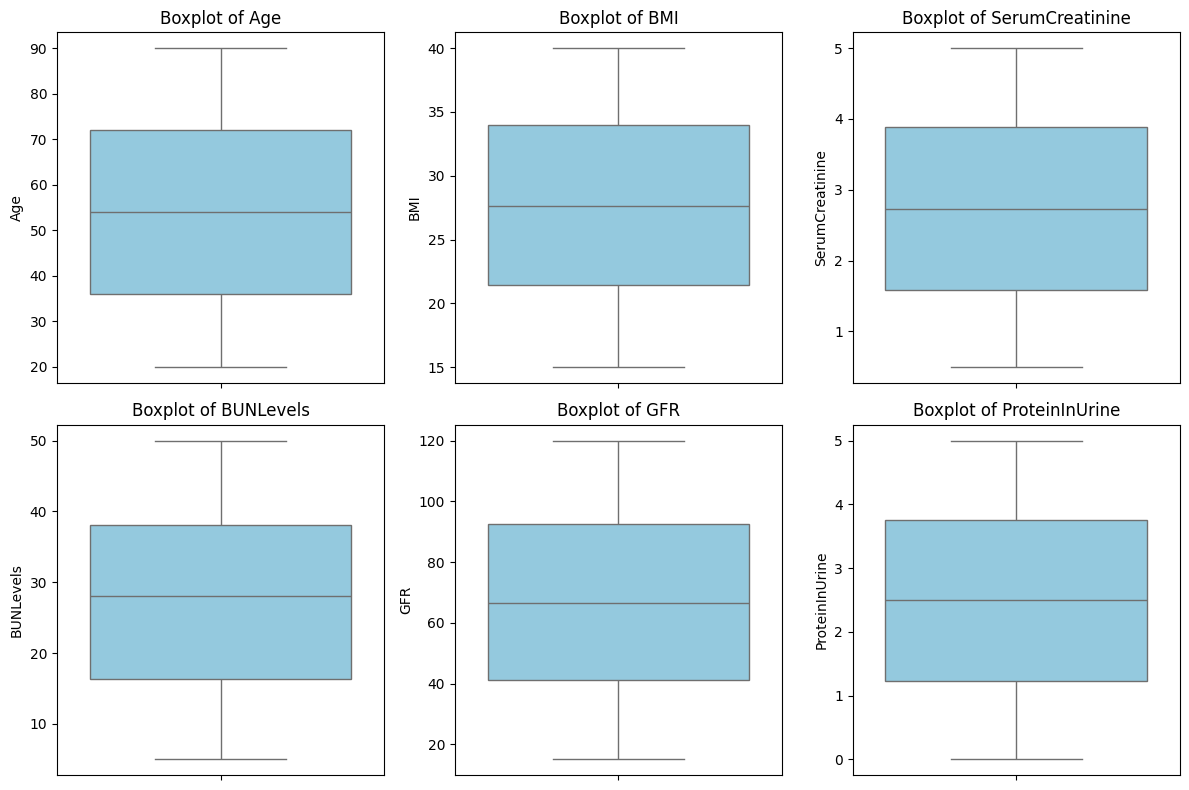

In [30]:
# Define the biomarkers for boxplot analysis
biomarkers = ["Age", "BMI", "SerumCreatinine", "BUNLevels", "GFR", "ProteinInUrine"]

# Set up the figure size
plt.figure(figsize=(12, 8))

# Loop through biomarkers to create boxplots
for i, col in enumerate(biomarkers, 1):
    plt.subplot(2, 3, i)  
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

1. **No Significant Outliers**  
   - There are no extreme points outside the whiskers, indicating that the dataset does not contain obvious outliers for these biomarkers indicating **clean data** with no extreme deviations that might require special handling.  

2. **Data Spread and Variability**  
   - The **Interquartile Range (IQR)** represents the spread of the middle 50% of the data.  
   - **Serum Creatinine and Protein in Urine** have relatively smaller ranges, while **GFR and BUN Levels** show a wider distribution.  

3. **Median and Symmetry**  
   - The **medians (horizontal lines inside the boxes)** are mostly centered, suggesting fairly symmetric distributions.  
   - If the median was skewed toward the top or bottom, it would indicate a skewed distribution.  


Correlation Heatmap Analysis

To visually represent the relationships between the variable. Helps identify patterns, dependencies or highly correlated features

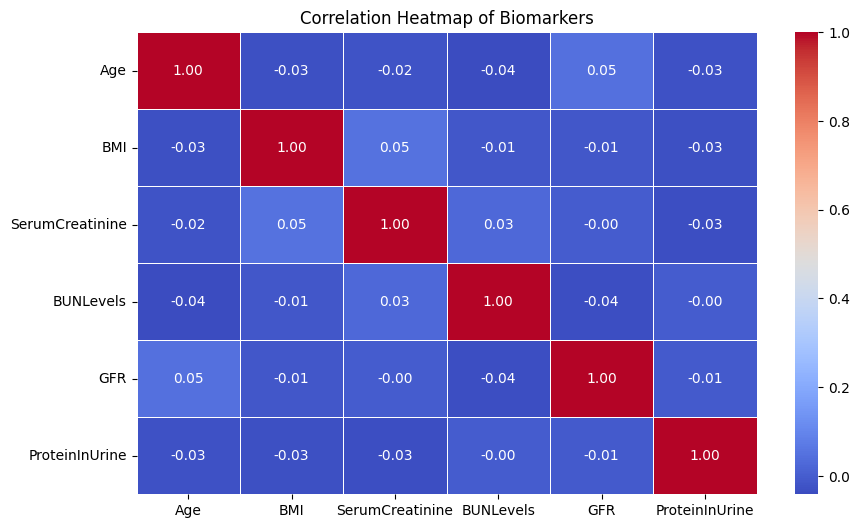

In [31]:
# Compute the correlation matrix
corr_matrix = df_encoded1[biomarkers].corr()

# Set up the figure size
plt.figure(figsize=(10, 6))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Heatmap of Biomarkers")

# Show plot
plt.show()


In [32]:
df_encoded1.columns

Index(['PatientID', 'Age', 'Gender', 'SocioeconomicStatus', 'EducationLevel',
       'BMI', 'Smoking', 'AlcoholConsumption', 'DietQuality', 'SleepQuality',
       'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension',
       'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury',
       'UrinaryTractInfections', 'SystolicBP', 'DiastolicBP',
       'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels', 'GFR',
       'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium',
       'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium',
       'SerumElectrolytesPhosphorus', 'HemoglobinLevels', 'CholesterolTotal',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
       'ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins',
       'AntidiabeticMedications', 'Edema', 'FatigueLevels', 'NauseaVomiting',
       'MuscleCramps', 'Itching', 'QualityOfLifeScore', 'HeavyMetalsExposure',
       'OccupationalExposureChemicals', 'WaterQuality',
       'MedicalCheckupsFrequency

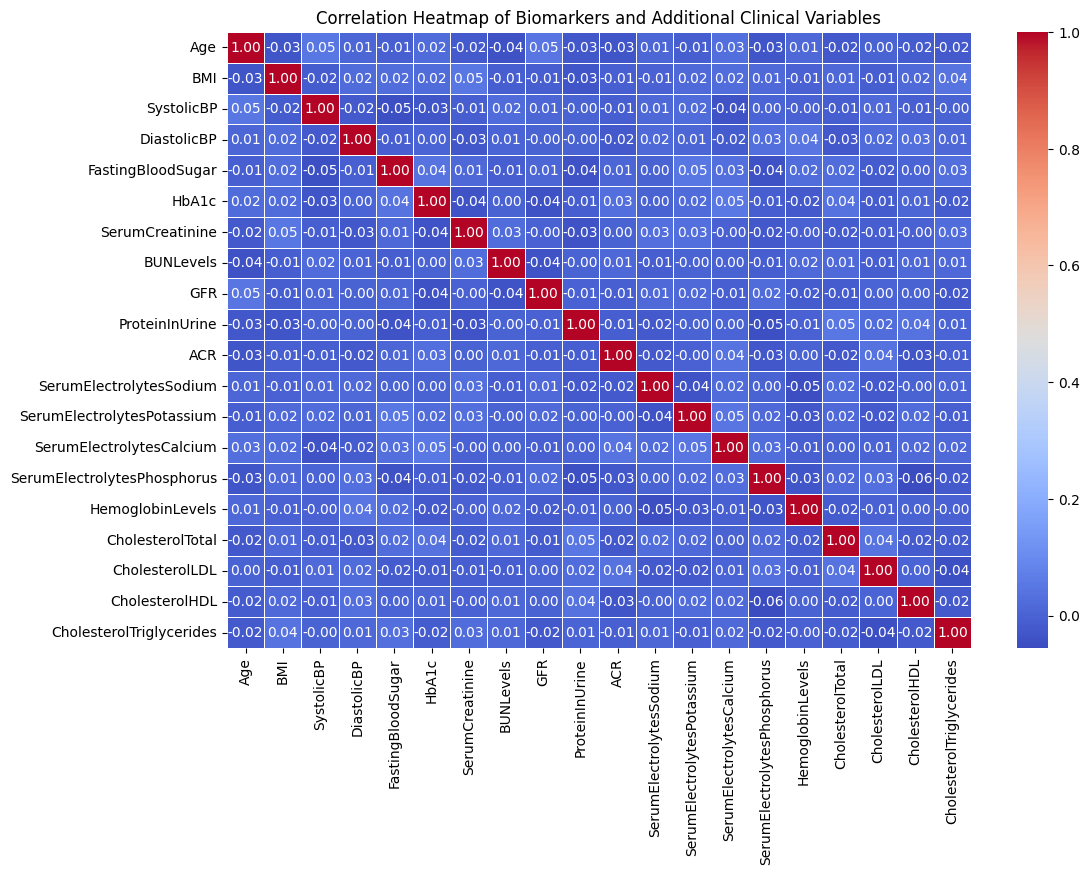

In [33]:
updated_biomarkers = [
    'Age', 'BMI', 'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c',
    'SerumCreatinine', 'BUNLevels', 'GFR', 'ProteinInUrine', 'ACR',
    'SerumElectrolytesSodium', 'SerumElectrolytesPotassium',
    'SerumElectrolytesCalcium', 'SerumElectrolytesPhosphorus',
    'HemoglobinLevels', 'CholesterolTotal', 'CholesterolLDL',
    'CholesterolHDL', 'CholesterolTriglycerides'
]

# Compute correlation matrix
corr_matrix = df_encoded1[updated_biomarkers].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Biomarkers and Additional Clinical Variables")
plt.show()


Weak Correlations
- Most variables exhibit weak correlations (close to 0), indicating low linear relationships.
- This suggests that simple linear associations may not fully capture the interactions between biomarkers and clinical variables.

Notable Correlations
- **SystolicBP and DiastolicBP**: As expected, they show a strong correlation (~1.00), since both measure blood pressure.
- **SerumCreatinine and GFR**: There is a mild inverse correlation, which aligns with the biological expectation that increased creatinine is associated with decreased kidney filtration efficiency.
- **Protein in Urine and ACR**: A stronger relationship is expected here, as both are indicators of kidney damage.
- **Cholesterol Levels**: LDL, Total Cholesterol, and Triglycerides show moderate positive correlations, which is consistent with their role in lipid metabolism.

Next Steps
- **Feature Selection**: Since correlations are weak, we may need advanced methods such as Principal Component Analysis (PCA) or feature engineering to determine the most relevant variables.
- **Stratified Analysis**: Examining correlations within different CKD stages or demographic groups could provide deeper insights into variable relationships.



CKD Prevelance Analysis

C:\Users\glori\AppData\Local\Temp\ipykernel_27804\2595767458.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_encoded1, x='CKD_Stage', palette='Blues')


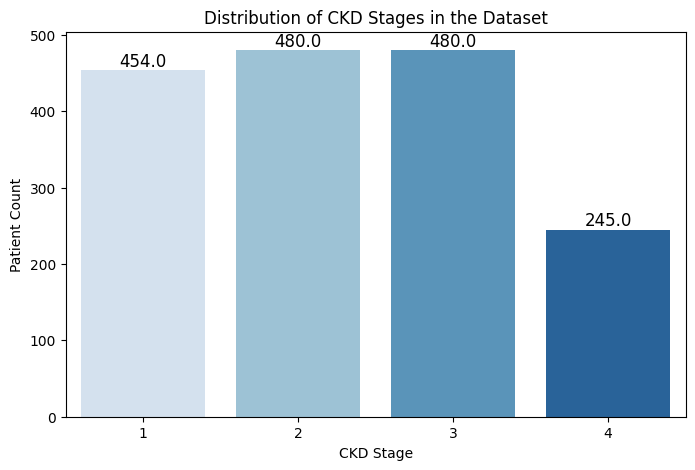

In [34]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_encoded1, x='CKD_Stage', palette='Blues')

plt.xlabel('CKD Stage')
plt.ylabel('Patient Count')
plt.title('Distribution of CKD Stages in the Dataset')

# Show values on bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                        ha='center', va='bottom', fontsize=12)

plt.show()

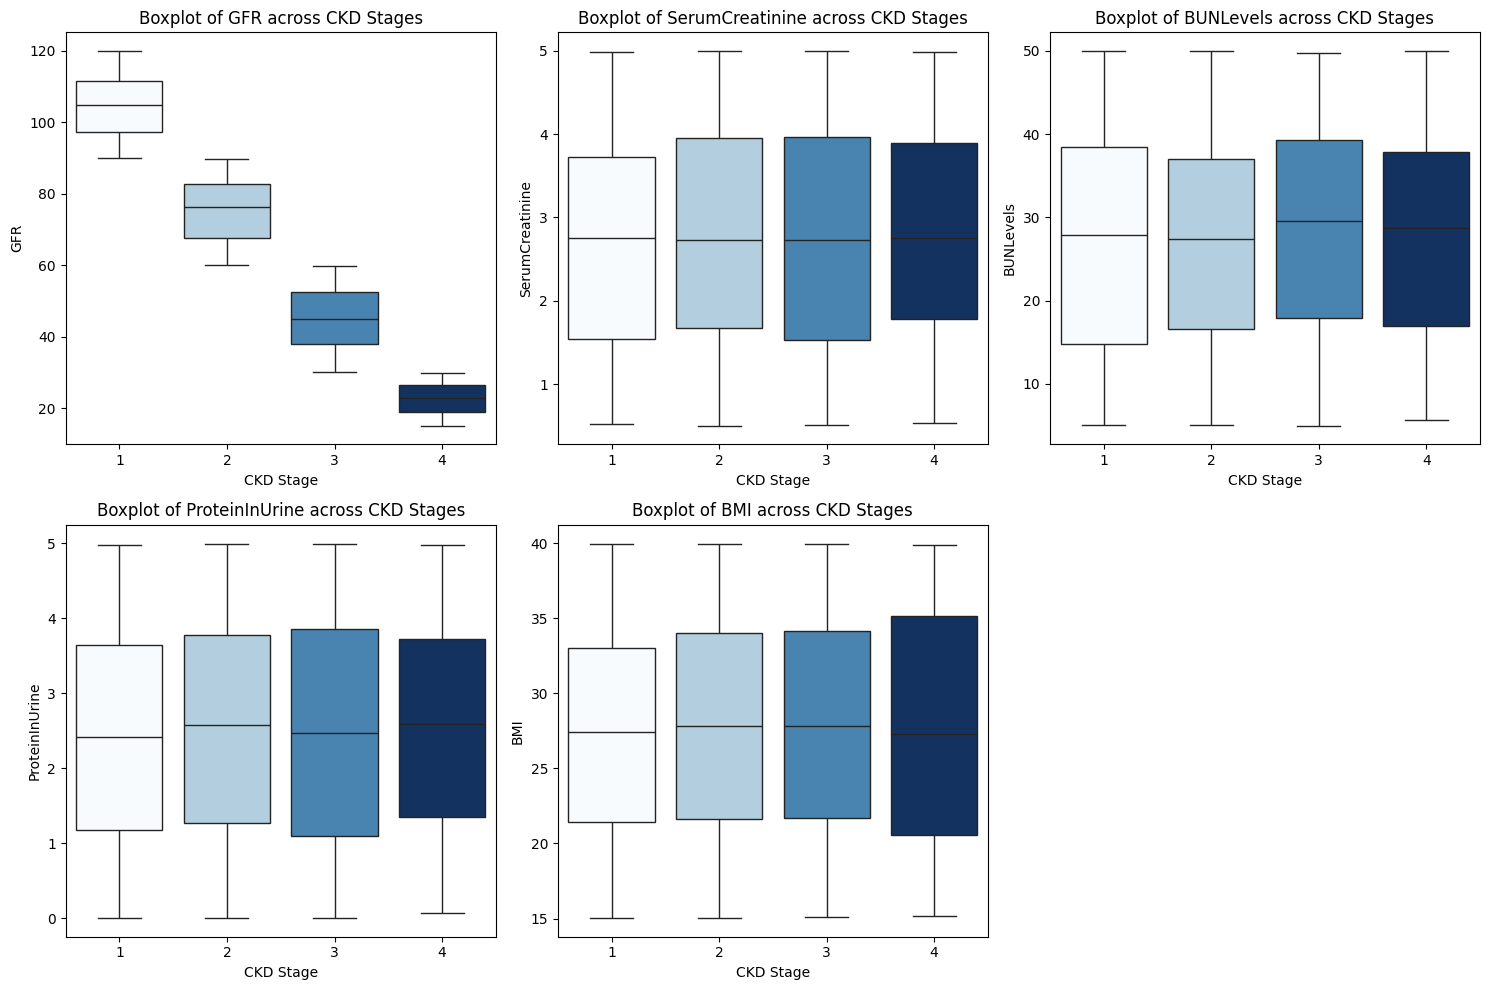

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of biomarkers to plot
biomarkers = ['GFR', 'SerumCreatinine', 'BUNLevels', 'ProteinInUrine', 'BMI']

# Set figure size
plt.figure(figsize=(15, 10))

# Create subplots
for i, biomarker in enumerate(biomarkers, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_encoded1['CKD_Stage'], y=df[biomarker], hue=y, palette='Blues', legend=False)
    plt.title(f'Boxplot of {biomarker} across CKD Stages')
    plt.xlabel('CKD Stage')
    plt.ylabel(biomarker)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
import scipy.stats as stats

# Selecting numerical biomarkers for testing
biomarkers = ["GFR", "SerumCreatinine", "BUNLevels", "ProteinInUrine", "BMI"]
ckd_stage_col = "CKD_Stage"

# Conduct normality tests (Shapiro-Wilk)
print("### Normality Test (Shapiro-Wilk) ###")
for biomarker in biomarkers:
    for stage in df_encoded1[ckd_stage_col].unique():
        data = df_encoded1[df_encoded1[ckd_stage_col] == stage][biomarker].dropna()
        stat, p = stats.shapiro(data)
        print(f"{biomarker} - CKD Stage {stage}: p-value = {p:.5f}")

# Levene’s test for variance homogeneity
print("\n### Levene’s Test for Equal Variance ###")
for biomarker in biomarkers:
    groups = [df_encoded1[df_encoded1[ckd_stage_col] == stage][biomarker].dropna() for stage in df_encoded1[ckd_stage_col].unique()]
    stat, p = stats.levene(*groups)
    print(f"{biomarker}: p-value = {p:.5f}")

# ANOVA or Kruskal-Wallis test based on normality results
print("\n### Group Comparisons Across CKD Stages ###")
for biomarker in biomarkers:
    groups = [df_encoded1[df_encoded1[ckd_stage_col] == stage][biomarker].dropna() for stage in df_encoded1[ckd_stage_col].unique()]
    
    # Use ANOVA if all groups pass normality, otherwise use Kruskal-Wallis
    normality_pass = all(stats.shapiro(group)[1] > 0.05 for group in groups)
    if normality_pass:
        stat, p = stats.f_oneway(*groups)
        print(f"{biomarker}: ANOVA p-value = {p:.5f}")
    else:
        stat, p = stats.kruskal(*groups)
        print(f"{biomarker}: Kruskal-Wallis p-value = {p:.5f}")

# Chi-Square Test for categorical variables
categorical_vars = ["Smoking", "AlcoholConsumption", "FamilyHistoryKidneyDisease"]
print("\n### Chi-Square Test for Categorical Variables ###")
for var in categorical_vars:
    contingency_table = pd.crosstab(df_encoded1[var], df_encoded1[ckd_stage_col])
    stat, p, _, _ = stats.chi2_contingency(contingency_table)
    print(f"{var}: Chi-Square p-value = {p:.5f}")

### Normality Test (Shapiro-Wilk) ###
GFR - CKD Stage 3: p-value = 0.00000
GFR - CKD Stage 2: p-value = 0.00000
GFR - CKD Stage 1: p-value = 0.00000
GFR - CKD Stage 4: p-value = 0.00000
SerumCreatinine - CKD Stage 3: p-value = 0.00000
SerumCreatinine - CKD Stage 2: p-value = 0.00000
SerumCreatinine - CKD Stage 1: p-value = 0.00000
SerumCreatinine - CKD Stage 4: p-value = 0.00000
BUNLevels - CKD Stage 3: p-value = 0.00000
BUNLevels - CKD Stage 2: p-value = 0.00000
BUNLevels - CKD Stage 1: p-value = 0.00000
BUNLevels - CKD Stage 4: p-value = 0.00000
ProteinInUrine - CKD Stage 3: p-value = 0.00000
ProteinInUrine - CKD Stage 2: p-value = 0.00000
ProteinInUrine - CKD Stage 1: p-value = 0.00000
ProteinInUrine - CKD Stage 4: p-value = 0.00000
BMI - CKD Stage 3: p-value = 0.00000
BMI - CKD Stage 2: p-value = 0.00000
BMI - CKD Stage 1: p-value = 0.00000
BMI - CKD Stage 4: p-value = 0.00000

### Levene’s Test for Equal Variance ###
GFR: p-value = 0.00000
SerumCreatinine: p-value = 0.12265
BUNLev

In [8]:
!pip install pandas numpy scikit-learn seaborn matplotlib

# **Feature Engineering**

1. Handling Skewed Data (Non-Normal Distributions)
Many clinical variables (e.g., GFR, SerumCreatinine, BUNLevels) do not follow a normal distribution. Since our normality tests confirmed non-normality, we apply transformations:

Log Transformation: Applied to variables with highly skewed distributions to reduce variance and improve model performance.

Alternative Transformations: Box-Cox (for positive values) or Yeo-Johnson (for mixed positive/negative values)





In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df_fe = pd.read_csv("updated_CKD_data1.csv")

df_fe.head()

,PatientID,Age,Gender,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,DietQuality,SleepQuality,...,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,CKD_Stage,Ethnicity_Caucasian,Ethnicity_AfricanAmerican,Ethnicity_Asian,Ethnicity_Other
0,1,71,0,0,2,31,1,5,0,4,...,1,1,4,9,1,3,1,0,0,0
1,2,34,0,1,3,29,1,18,6,7,...,0,3,8,7,1,3,1,0,0,0
2,3,80,1,0,1,37,1,11,2,4,...,1,1,7,7,1,2,0,1,0,0
3,4,40,0,0,1,31,0,16,6,6,...,0,3,3,6,1,3,0,0,1,0
4,5,43,0,1,2,23,0,7,3,4,...,1,0,3,1,1,3,0,1,0,0


In [3]:
# Drop insignificant columns
drop_cols = ["PatientID", "Diagnosis"]
df_fe = df_fe.drop(columns=[col for col in drop_cols if col in df_fe.columns])
df_fe.head()

,Age,Gender,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,DietQuality,SleepQuality,FamilyHistoryKidneyDisease,...,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,CKD_Stage,Ethnicity_Caucasian,Ethnicity_AfricanAmerican,Ethnicity_Asian,Ethnicity_Other
0,71,0,0,2,31,1,5,0,4,0,...,0,1,1,4,9,3,1,0,0,0
1,34,0,1,3,29,1,18,6,7,1,...,0,0,3,8,7,3,1,0,0,0
2,80,1,0,1,37,1,11,2,4,0,...,1,1,1,7,7,2,0,1,0,0
3,40,0,0,1,31,0,16,6,6,0,...,0,0,3,3,6,3,0,0,1,0
4,43,0,1,2,23,0,7,3,4,0,...,0,1,0,3,1,3,0,1,0,0


In [4]:
# Encode categorical variables
categorical_cols = ["Gender", "EducationLevel"]

df_fe = pd.get_dummies(df_fe, columns=categorical_cols, drop_first=True)

In [5]:
# Generate new features
df_fe["BUN_Creatinine_Ratio"] = df_fe["BUNLevels"] / (df_fe["SerumCreatinine"] + 1e-8)
df_fe["Protein_GFR_Ratio"] = df_fe["ProteinInUrine"] / df_fe["GFR"]
df_fe["PulsePressure"] = df_fe["SystolicBP"] - df_fe["DiastolicBP"]
df_fe["LDL_HDL_Ratio"] = df_fe["CholesterolLDL"] / df_fe["CholesterolHDL"]

df_fe.head()

,Age,SocioeconomicStatus,BMI,Smoking,AlcoholConsumption,DietQuality,SleepQuality,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,FamilyHistoryDiabetes,...,Ethnicity_Asian,Ethnicity_Other,Gender_1,EducationLevel_1,EducationLevel_2,EducationLevel_3,BUN_Creatinine_Ratio,Protein_GFR_Ratio,PulsePressure,LDL_HDL_Ratio
0,71,0,31,1,5,0,4,0,0,0,...,0,0,False,False,True,False,6.250000,0.000000,30,4.047619
1,34,1,29,1,18,6,7,1,1,0,...,0,0,False,False,False,True,10.333333,0.054545,53,0.988506
2,80,0,37,1,11,2,4,0,0,0,...,0,0,True,True,False,False,13.000000,0.014925,41,6.600000
3,40,0,31,0,16,6,6,0,0,0,...,1,0,False,True,False,False,10.500000,0.090909,52,1.603448
4,43,1,23,0,7,3,4,0,0,0,...,0,0,False,False,True,False,4.000000,0.035714,32,8.142857


In [6]:
import numpy as np

num_features = ["Age", "BMI", "SystolicBP", "DiastolicBP", "FastingBloodSugar",
                "HbA1c", "SerumCreatinine", "BUNLevels", "GFR", "ProteinInUrine",
                "ACR", "SerumElectrolytesSodium", "SerumElectrolytesPotassium",
                "SerumElectrolytesCalcium", "SerumElectrolytesPhosphorus", 
                "HemoglobinLevels", "CholesterolTotal", "CholesterolLDL", 
                "CholesterolHDL", "CholesterolTriglycerides", "FatigueLevels",
                "NauseaVomiting", "MuscleCramps", "Itching", "QualityOfLifeScore",
                "BUN_Creatinine_Ratio", "Protein_GFR_Ratio", "PulsePressure", "LDL_HDL_Ratio"]


# Check for NaN values
print("Missing values:\n", df_fe[num_features].isnull().sum())

# Check for Infinite values
print("Infinite values:\n", np.isinf(df_fe[num_features]).sum())


Missing values:
 Age                            0
BMI                            0
SystolicBP                     0
DiastolicBP                    0
FastingBloodSugar              0
HbA1c                          0
SerumCreatinine                0
BUNLevels                      0
GFR                            0
ProteinInUrine                 0
ACR                            0
SerumElectrolytesSodium        0
SerumElectrolytesPotassium     0
SerumElectrolytesCalcium       0
SerumElectrolytesPhosphorus    0
HemoglobinLevels               0
CholesterolTotal               0
CholesterolLDL                 0
CholesterolHDL                 0
CholesterolTriglycerides       0
FatigueLevels                  0
NauseaVomiting                 0
MuscleCramps                   0
Itching                        0
QualityOfLifeScore             0
BUN_Creatinine_Ratio           0
Protein_GFR_Ratio              0
PulsePressure                  0
LDL_HDL_Ratio                  0
dtype: int64
Infinite valu

In [9]:
# standardize numerical features
num_features = ["Age", "BMI", "SystolicBP", "DiastolicBP", "FastingBloodSugar",
                "HbA1c", "SerumCreatinine", "BUNLevels", "GFR", "ProteinInUrine",
                "ACR", "SerumElectrolytesSodium", "SerumElectrolytesPotassium",
                "SerumElectrolytesCalcium", "SerumElectrolytesPhosphorus", 
                "HemoglobinLevels", "CholesterolTotal", "CholesterolLDL", 
                "CholesterolHDL", "CholesterolTriglycerides", "FatigueLevels",
                "NauseaVomiting", "MuscleCramps", "Itching", "QualityOfLifeScore",
                "BUN_Creatinine_Ratio", "Protein_GFR_Ratio", "PulsePressure", "LDL_HDL_Ratio"]

scaler = StandardScaler()
df_fe[num_features] = scaler.fit_transform(df_fe[num_features])


**Feature selection using Principal Component Analysis**

PCA is a dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional space while retaining the most important information

In [10]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_fe)

df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

In [11]:
df_pca.head()

,PC1,PC2
0,-4.450427,0.492093
1,8.473641,3.900915
2,1.530497,1.617823
3,6.476658,-0.752665
4,-2.404861,-0.105386


In [12]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

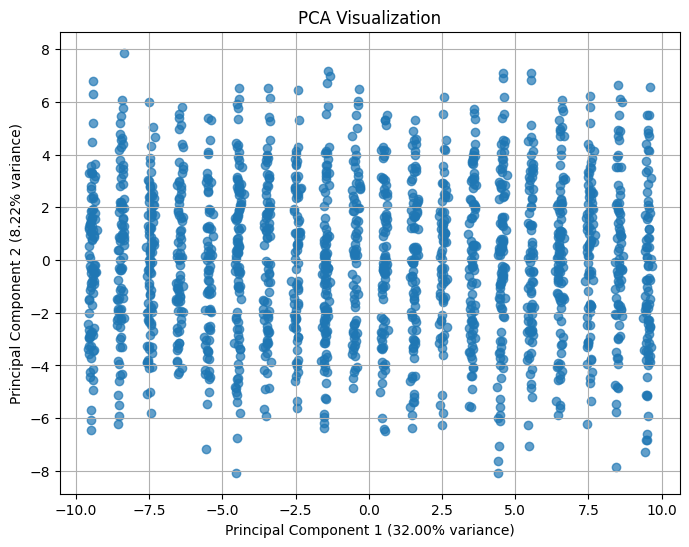

In [13]:
# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.7)
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2%} variance)')
plt.title('PCA Visualization')
plt.grid(True)
plt.show()

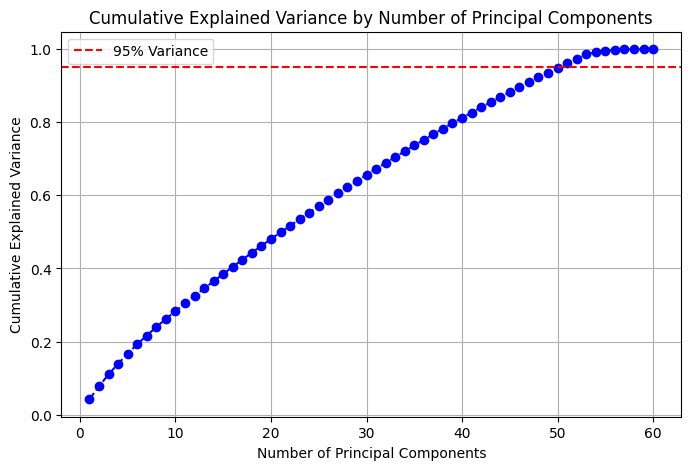

In [14]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_fe)  # Reusing the same features

# Perform PCA
pca = PCA()
pca.fit(df_scaled)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance by Number of Principal Components")
plt.grid(True)

# Show threshold line at 95% variance explained
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance")
plt.legend()

plt.show()


Number of principal components needed for 95% variance: 51


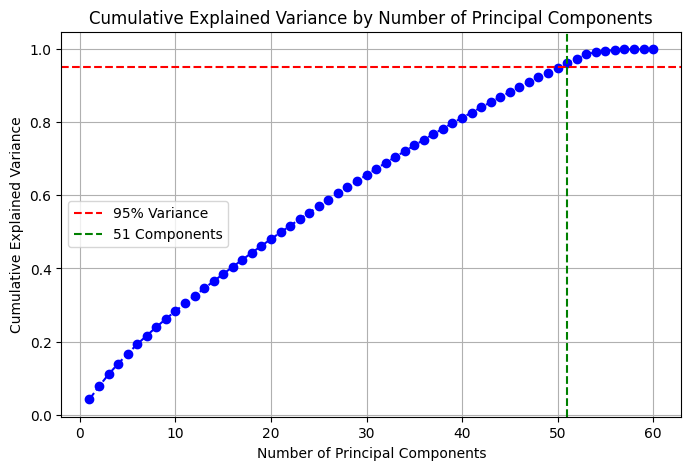

In [15]:
# Perform PCA
pca1 = PCA()
pca.fit(df_scaled)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components needed to explain 95% variance
num_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of principal components needed for 95% variance: {num_components_95}")

# Plot cumulative variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance by Number of Principal Components")
plt.grid(True)

# Show threshold line at 95% variance explained
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance")
plt.axvline(x=num_components_95, color='g', linestyle='--', label=f"{num_components_95} Components")
plt.legend()

plt.show()


In [16]:
# Apply PCA with the selected number of components
pca_optimal = PCA(n_components=num_components_95)
df_pca_reduced = pca_optimal.fit_transform(df_scaled)

# Convert to DataFrame
df_pca_reduced = pd.DataFrame(df_pca_reduced, columns=[f'PC{i+1}' for i in range(num_components_95)])

# Display first few rows
df_pca_reduced.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51
0,0.166724,0.013175,1.300233,1.101287,-0.859034,1.774935,-1.675053,0.046937,0.146701,-1.283580,...,0.011125,0.879797,0.098357,1.394696,1.561303,2.574026,0.481406,-0.023900,0.629840,-0.868230
1,0.820155,0.055993,-1.966507,0.906165,-0.665648,-1.217769,-0.265565,1.703373,-1.848417,-0.505819,...,0.231377,-1.161956,0.177238,1.321488,0.329323,-0.001689,0.214977,-1.621276,0.949327,0.411985
2,-0.619392,0.036650,3.200011,-2.313177,-0.624210,-1.335067,-0.225181,-1.130725,1.334090,-1.238150,...,1.153825,0.268107,-0.990924,1.023396,2.796354,0.045283,1.401941,1.426665,0.485565,-0.377298
3,1.744661,-0.532298,-0.646629,-1.428606,-0.923850,-1.676638,-0.461037,-0.077013,-1.419839,1.509375,...,-0.738753,-0.239002,0.732015,0.910742,1.342797,0.316553,-0.672208,1.154045,-0.353730,-0.680031
4,0.809960,0.501183,3.938615,-1.471911,-0.141767,2.008763,0.721002,-0.754903,-0.245780,-1.875657,...,0.368638,-0.153992,1.116969,-1.258419,0.647201,0.071102,0.947240,-1.822566,1.963972,0.133869


In [17]:
df_pca_reduced.shape

(1659, 51)

# Exploratory Data Analysis on Principal Components

Summary Statistics

Basic Statistics

In [23]:
df_pca_reduced.describe()   # Displays the distributions of the principal components

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51
count,1.659000e+03,1.659000e+03,1.659000e+03,1.659000e+03,1.659000e+03,1.659000e+03,1.659000e+03,1.659000e+03,1.659000e+03,1.659000e+03,...,1.659000e+03,1.659000e+03,1.659000e+03,1.659000e+03,1.659000e+03,1.659000e+03,1.659000e+03,1.659000e+03,1.659000e+03,1.659000e+03
mean,4.282958e-17,-1.413376e-16,-2.141479e-17,2.377042e-16,5.353698e-17,8.565916e-18,-7.923472e-17,-3.212219e-17,2.355627e-17,-6.103215e-17,...,8.833601e-17,-8.351768e-17,1.049325e-16,-5.567845e-17,1.927331e-17,-4.282958e-17,3.372829e-17,-9.850803e-17,1.927331e-17,-7.281029e-17
std,1.588508e+00,1.454747e+00,1.403093e+00,1.323395e+00,1.279279e+00,1.250045e+00,1.196594e+00,1.178873e+00,1.160215e+00,1.131455e+00,...,9.231846e-01,9.178725e-01,9.148014e-01,9.085682e-01,9.020018e-01,8.989241e-01,8.894504e-01,8.871539e-01,8.812256e-01,8.694167e-01
min,-3.225971e+00,-4.155615e+00,-2.858930e+00,-2.830613e+00,-3.017145e+00,-2.877251e+00,-3.666040e+00,-3.352324e+00,-3.010414e+00,-3.518073e+00,...,-3.387637e+00,-3.212489e+00,-2.499797e+00,-2.911811e+00,-2.637591e+00,-2.974842e+00,-2.669192e+00,-2.576884e+00,-2.823363e+00,-3.348818e+00
25%,-1.254710e+00,-1.062668e+00,-9.902953e-01,-1.359136e+00,-8.300124e-01,-1.081152e+00,-8.459500e-01,-8.189863e-01,-7.838251e-01,-7.708317e-01,...,-6.173966e-01,-6.469618e-01,-6.100871e-01,-6.192696e-01,-6.087357e-01,-5.867631e-01,-6.130149e-01,-5.678854e-01,-5.964878e-01,-5.774709e-01
50%,-1.448243e-01,2.033220e-02,-1.944763e-01,6.415712e-01,-1.942467e-01,-1.857209e-01,1.631258e-02,-1.597666e-01,-9.039869e-02,-6.509131e-03,...,1.802843e-02,-1.392487e-02,2.594313e-02,-1.483935e-02,-1.362462e-02,2.736567e-02,-1.698653e-03,-1.776699e-04,6.408988e-03,-9.232348e-03
75%,1.012640e+00,1.050945e+00,8.564278e-01,1.137083e+00,4.558653e-01,1.146652e+00,8.694734e-01,6.926325e-01,6.905018e-01,7.369067e-01,...,6.395655e-01,6.334069e-01,6.303938e-01,6.350538e-01,6.205317e-01,5.906300e-01,6.024286e-01,5.930176e-01,5.875847e-01,5.793665e-01
max,5.324441e+00,3.895091e+00,5.229746e+00,2.198992e+00,5.092987e+00,3.112781e+00,3.520370e+00,3.579464e+00,4.552345e+00,3.712673e+00,...,3.169867e+00,2.795223e+00,2.864390e+00,2.613697e+00,3.365499e+00,2.885750e+00,2.929853e+00,2.526588e+00,3.390026e+00,2.889216e+00


Pairwise correlation between principal components

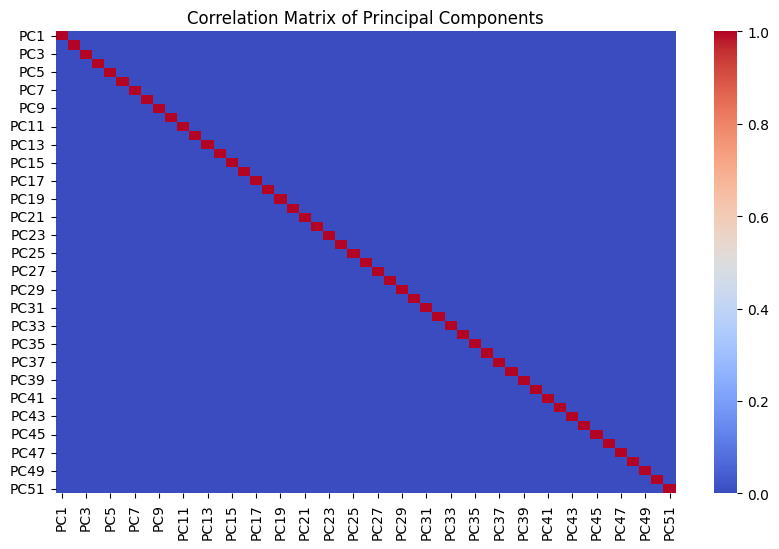

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df_pca_reduced.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix of Principal Components")
plt.show()


**Correlation Matrix of Principal Components**

The heatmap above visualizes the **correlation matrix of the principal components (PCs)** obtained from Principal Component Analysis (PCA). Key observations:

1. **Diagonal Dominance**: The red diagonal represents a correlation of 1.0 for each PC with itself.
2. **Near-Zero Off-Diagonal Values**: The blue background indicates that different principal components are **uncorrelated** with each other.
3. **Orthogonality of Principal Components**: PCA constructs new features (PCs) that are **independent** of each other, ensuring that each component captures distinct information from the dataset.

This confirms that PCA has effectively transformed the dataset into a set of uncorrelated variables, reducing redundancy and improving interpretability for further statistical analysis.


Distribution of PCA features

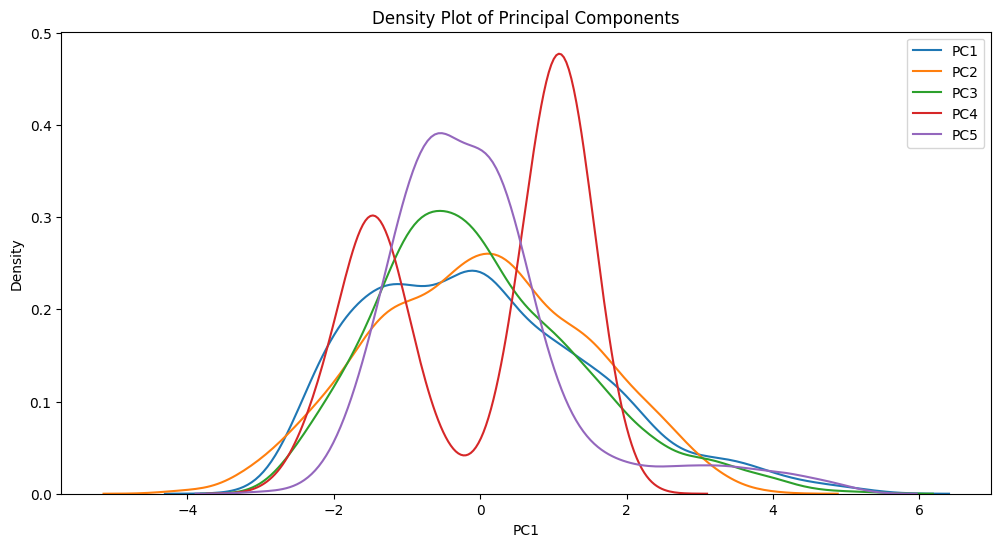

In [25]:
import seaborn as sns

plt.figure(figsize=(12, 6))
for i in range(1, 6):  # First 5 PCs
    sns.kdeplot(df_pca_reduced[f'PC{i}'], label=f'PC{i}')

plt.legend()
plt.title("Density Plot of Principal Components")
plt.show()


Analysis of the Density Plot of Principal Components

The density plot above represents the **distribution** of the first five Principal Components (PCs). Key observations:

1. **Different Distributions**: Each PC has a unique distribution, indicating that the transformation has extracted distinct patterns from the data.

2. **Centered Around Zero***: Most components have a mean close to zero, which is expected since PCA produces components with a mean of zero after standardization.

3. **Varying Spread (Variance)**: Some PCs i.e PC4 and PC5 have a more concentrated distribution, meaning they contribute less variance, while others i.e PC1 have a broader spread, indicating they explain more variance in the data.

4. **Skewness and Multi-modal Shapes**: Some PCs show skewness or bimodal distributions, which might indicate the presence of different subpopulations or complex structures in the data.



PCA Scatter Plot: Relationship between first two components

This helps visualize the separation between the CKD Stages

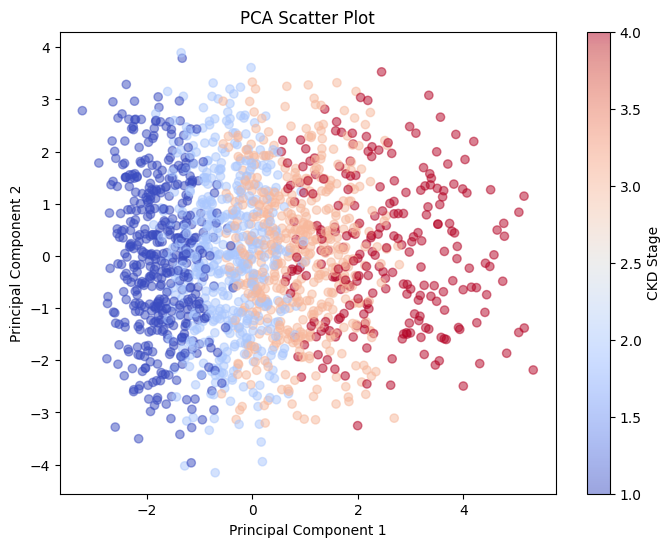

In [ ]:
y = df_fe["CKD_Stage"]

plt.figure(figsize=(8,6))
plt.scatter(df_pca_reduced['PC1'], df_pca_reduced['PC2'], c=y, cmap="coolwarm", alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Scatter Plot")
plt.colorbar(label="CKD Stage")
plt.show()

X-axis (PC1) and Y-axis (PC2): These represent the first two principal components, which capture the most variance in the dataset.

Color Gradient: The colorbar represents different CKD stages (from 1 to 4).

Interpretation:

There is a clear separation between lower and higher CKD stages along the PC1 axis.
Blue points (lower CKD stages) are mostly on the left, while red points (higher CKD stages) are on the right.
This suggests that PCA has captured meaningful variance related to disease progression.

Implications:

The separation suggests that CKD stages correlate with the transformed features.
This dimensionality reduction may help in classification tasks

Boxplot to illustrate the distribution of the first principal component across the different CKD Stages

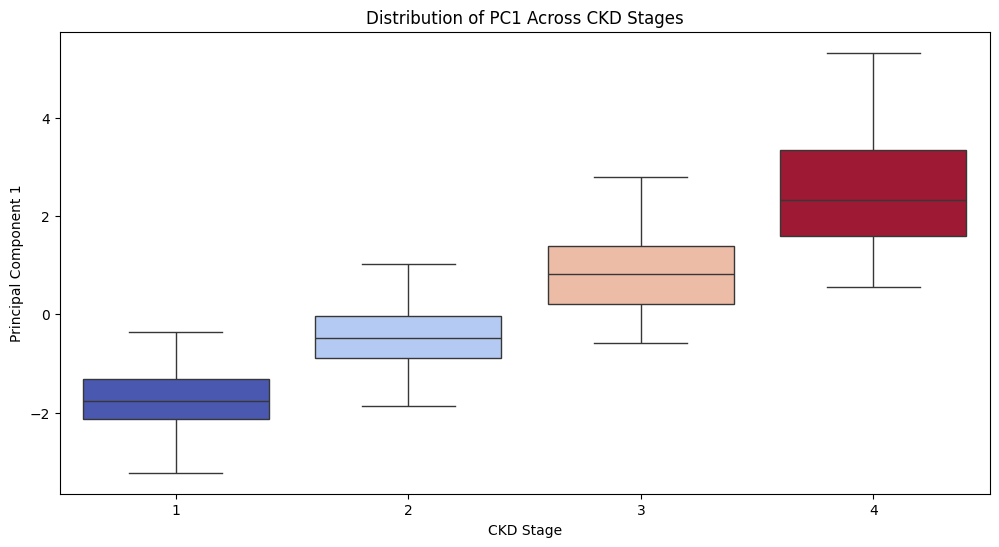

In [32]:
y = df_fe["CKD_Stage"]

# Set figure size
plt.figure(figsize=(12, 6))

# Create boxplot of PC1 across CKD stages
sns.boxplot(x=y, y=df_pca_reduced["PC1"], hue=y, palette="coolwarm", legend=False)

# Add title and labels
plt.title("Distribution of PC1 Across CKD Stages")
plt.xlabel("CKD Stage")
plt.ylabel("Principal Component 1")

# Show the plot
plt.show()

1. Trend Across CKD Stages
As CKD stage increases from 1 to 4, the median of PC1 shifts upwards.

This suggests that PC1 is positively correlated with CKD severity, meaning the principal component captures variance related to CKD progression.

2. Spread of Data
The interquartile range (IQR) (box height) increases slightly from stage 1 to stage 4.

This indicates that higher CKD stages have more variability in PC1 values.

Outliers (individual points beyond the whiskers) are present but not excessive.

3. Separation Between Groups
There is a clear distinction between CKD stage 1 and CKD stage 4.

Stages 2 and 3 seem to overlap slightly but still show a progressive trend.

This suggests that PC1 may help differentiate between early and advanced CKD.


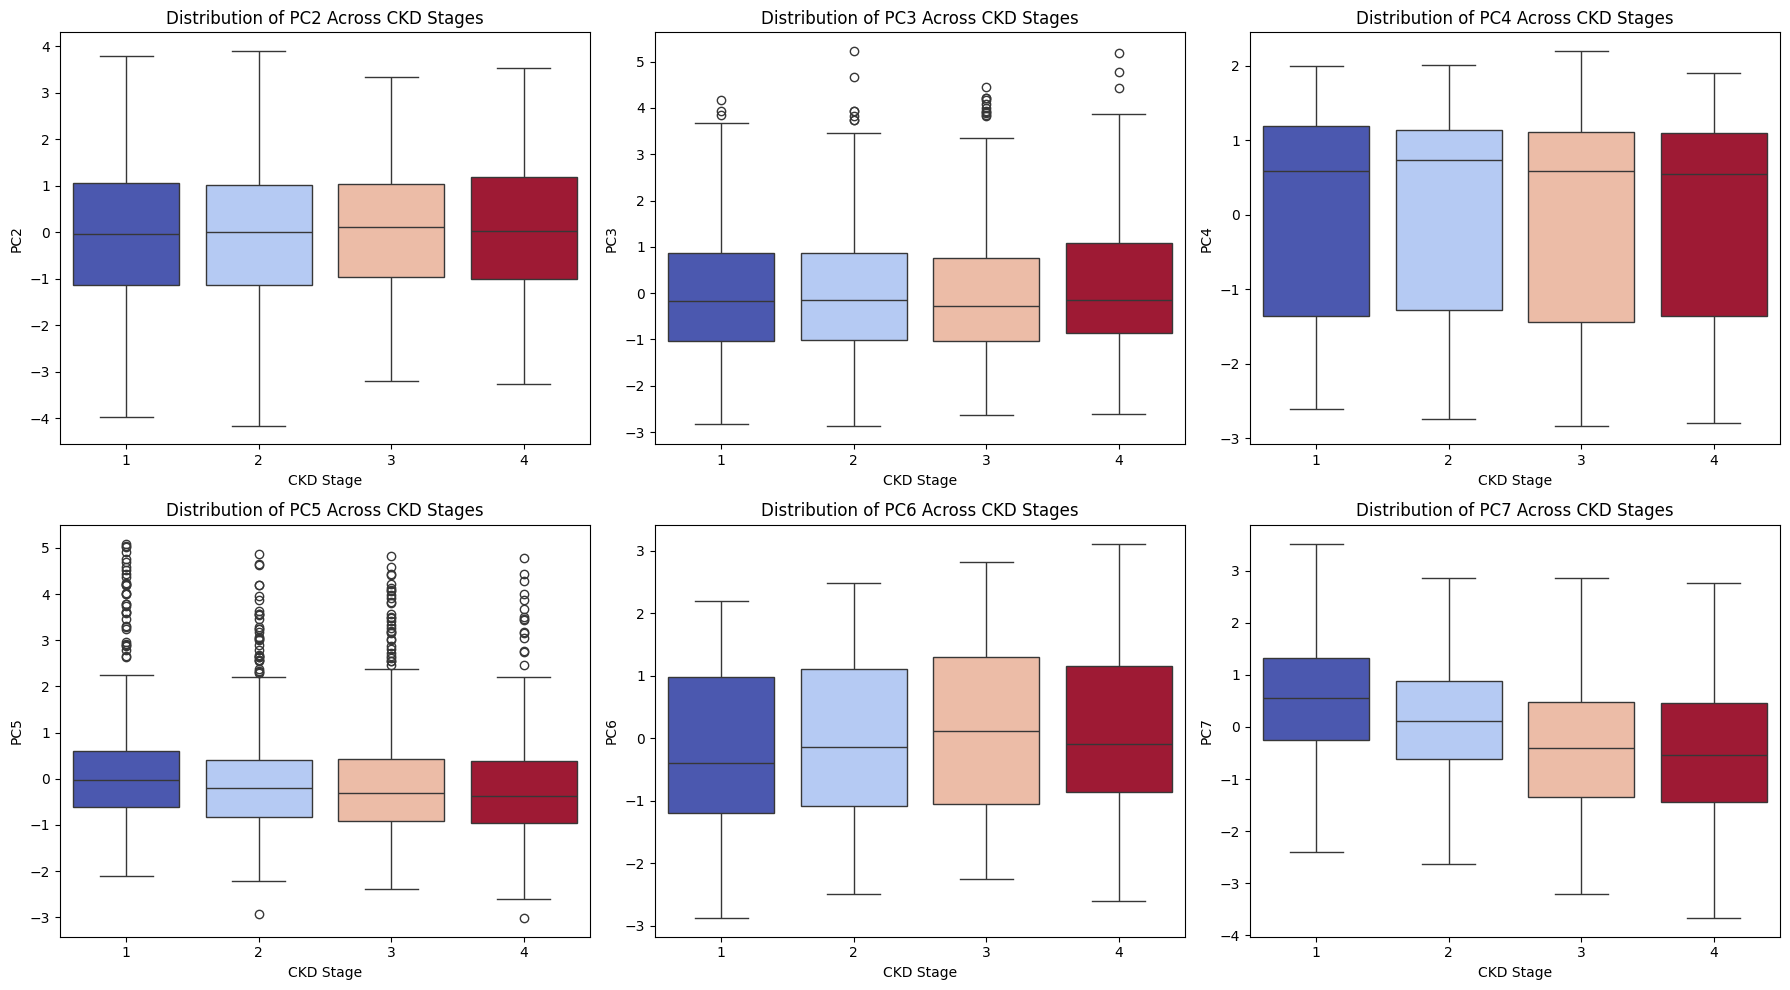

In [35]:
y = df_fe["CKD_Stage"]

pc_list = ['PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns

for i, pc in enumerate(pc_list):
    row, col = i // 3, i % 3  # Determine subplot position
    sns.boxplot(x=y, y=df_pca_reduced[pc], ax=axes[row, col], hue=y, palette="coolwarm", legend=False)
    axes[row, col].set_title(f"Distribution of {pc} Across CKD Stages")
    axes[row, col].set_xlabel("CKD Stage")
    axes[row, col].set_ylabel(pc)

plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()

In [36]:
# Assuming you used sklearn's PCA
explained_variance = pca.explained_variance_ratio_

# Check PC1 variance
print(f"Variance explained by PC1: {explained_variance[0]:.2%}")

# Check cumulative variance explained by first N components
cumulative_variance = explained_variance.cumsum()
print(f"Variance explained by first 6 PCs: {cumulative_variance[5]:.2%}")


Variance explained by PC1: 4.20%
Variance explained by first 6 PCs: 19.25%


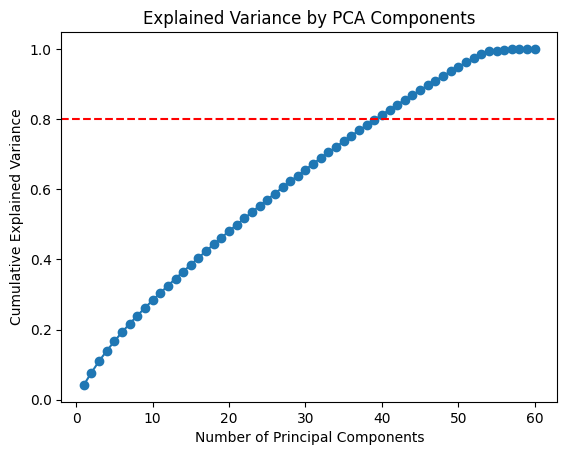

In [ ]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.8, color='r', linestyle='--')  # 80% threshold
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.show()

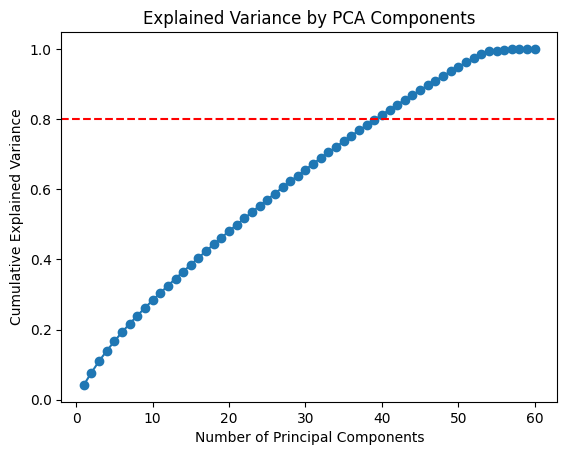

In [40]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.8, color='r', linestyle='--')  # 80% threshold
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.show()


In [41]:
from scipy.stats import kruskal
import pandas as pd

# Dictionary to store test results
kruskal_results = {}

# Loop through all 51 PCs
for i in range(1, 52):  # PC1 to PC51
    pc_name = f"PC{i}"
    groups = [df_pca_reduced[pc_name][y == stage] for stage in sorted(y.unique())]  # Group by CKD stage
    stat, p_value = kruskal(*groups)
    kruskal_results[pc_name] = p_value

# Convert to DataFrame and sort by p-value
kruskal_df = pd.DataFrame.from_dict(kruskal_results, orient='index', columns=['p_value'])
kruskal_df.sort_values('p_value', inplace=True)

# Display results
print(kruskal_df)


            p_value
PC1   1.788874e-296
PC7    2.184078e-39
PC9    5.284793e-09
PC8    6.985455e-05
PC5    2.786293e-04
PC6    1.818584e-03
PC15   7.844162e-03
PC11   1.057257e-02
PC12   3.497733e-02
PC26   4.318985e-02
PC37   6.144720e-02
PC28   1.012595e-01
PC41   1.052503e-01
PC21   1.268517e-01
PC44   1.632288e-01
PC13   2.279699e-01
PC14   2.315138e-01
PC27   2.487806e-01
PC50   2.575788e-01
PC39   2.590565e-01
PC30   2.985219e-01
PC4    3.085536e-01
PC23   4.138509e-01
PC17   4.382583e-01
PC45   4.469747e-01
PC10   4.515357e-01
PC47   4.543630e-01
PC36   4.797858e-01
PC3    5.024387e-01
PC43   5.885627e-01
PC33   6.146801e-01
PC2    6.188450e-01
PC51   6.313372e-01
PC20   6.456628e-01
PC49   6.522055e-01
PC35   6.536786e-01
PC32   6.547828e-01
PC29   6.978868e-01
PC31   7.167833e-01
PC38   7.481323e-01
PC25   7.547146e-01
PC19   7.672783e-01
PC34   8.053730e-01
PC24   8.400157e-01
PC48   8.629479e-01
PC40   8.939495e-01
PC42   8.950490e-01
PC16   9.412381e-01
PC22   9.588485e-01


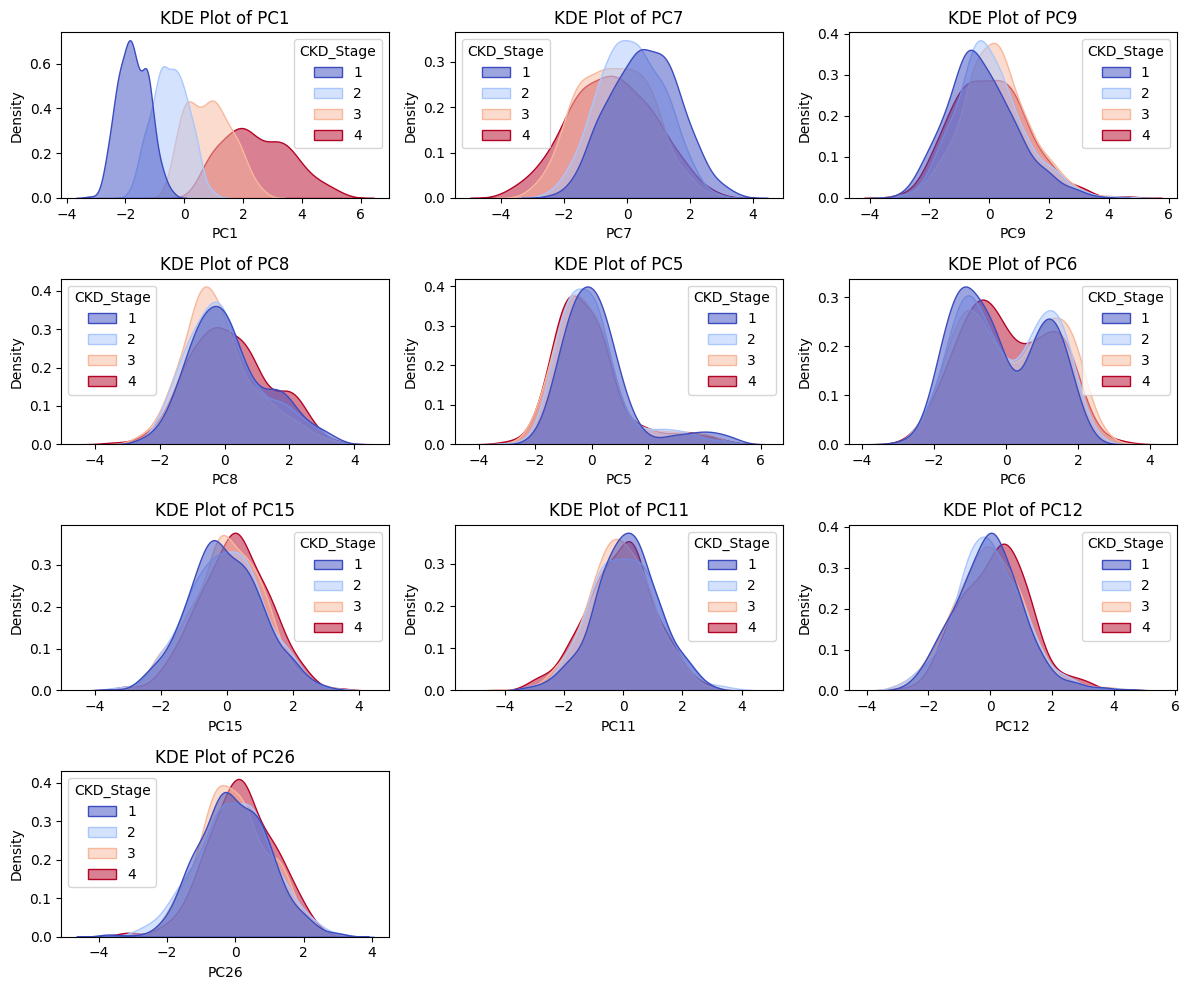

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_pcs = ['PC1', 'PC7', 'PC9', 'PC8', 'PC5', 'PC6', 'PC15', 'PC11', 'PC12', 'PC26']

plt.figure(figsize=(12, 10))
for i, pc in enumerate(selected_pcs, 1):
    plt.subplot(4, 3, i)
    sns.kdeplot(data=df_pca_reduced, x=pc, hue=y, common_norm=False, fill=True, alpha=0.5, palette="coolwarm")
    plt.title(f"KDE Plot of {pc}")
    plt.xlabel(pc)
    plt.ylabel("Density")

plt.tight_layout()
plt.show()


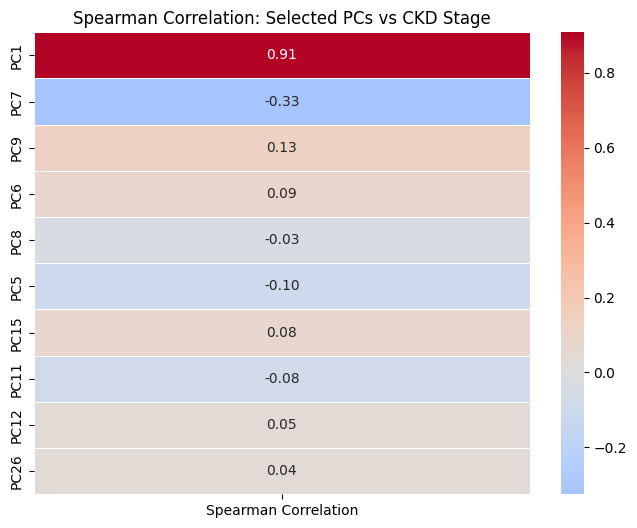

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# List of selected PCs
selected_pcs = ["PC1", "PC7", "PC9", "PC6", "PC8", "PC5", "PC15", "PC11", "PC12", "PC26"]

# Compute Spearman correlation
correlation_matrix = df_pca_reduced[selected_pcs].corrwith(df_fe["CKD_Stage"], method="spearman")

# Convert to DataFrame for visualization
corr_df = correlation_matrix.to_frame(name="Spearman Correlation")

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", center=0, fmt=".2f", linewidths=0.5)
plt.title("Spearman Correlation: Selected PCs vs CKD Stage")
plt.show()


**1. Performed PCA on the dataset.**

Calculated the explained variance of each principal component (PC).

Key results:

PC1 explains 4.2% of the total variance. First 6 PCs explain 19.25% of the total variance.

**2. Selected significant PCs**

Conducted statistical tests (p-values) to determine significant PCs.
Selected PCs with p < 0.05:

PC1 (p = 1.79e-296), PC7 (p = 2.18e-39), PC9 (p = 5.28e-09), PC8 (p = 6.98e-05), PC5 (p = 2.78e-04), PC6 (p = 1.81e-03), PC15 (p = 7.84e-03), PC11 (p = 1.05e-02), PC12 (p = 3.49e-02), PC26 (p = 4.31e-02)

KDE Plots for Selected PCs

Plotted Kernel Density Estimations (KDEs) for selected PCs.

Observed distinct distributions across CKD stages, especially for PC1 and PC7.

**3. Correlation Analysis**

Performed Spearman correlation between selected PCs and CKD stage.

Key findings:

PC1 shows the strongest correlation (0.91) with CKD stage.

PC7 has a moderate negative correlation (-0.33) with CKD stage.

Other PCs have weak correlations (close to 0).

**4. Final Principal Components for Prediction**

Based on significance tests, KDE plots, and correlation analysis, we selected PC1 (0.91 correlation) andPC7 (-0.33 correlation)
These two components will be used for Bayesian risk prediction.



# **Bayesian Risk Prediction**

Statistical approach that applies Bayes' theorem to estimate the probability of an event occuring based on prior knowledge and observed data. We'll use this method to predict a patient's risk of progressing to different CKD Stages based on clinical and demographic feautures

Incorporates prior knowledge, handling uncertainty, and providing interpretable risk estimates. This method can be valuable for early detection and management of CKD, guiding clinical decisions with a probabilistic framework.

## Using PCA data

In [ ]:
selected_pcs = ["PC1", "PC7"] 
df_selected_pcs = df_pca_reduced[selected_pcs]

# Display first few rows to confirm
df_selected_pcs.head()

,PC1,PC7
0,0.166724,-1.675053
1,0.820155,-0.265565
2,-0.619392,-0.225181
3,1.744661,-0.461037
4,0.809960,0.721002


**Fit Distributions to each CKD Stage**

Since the PCs are continuous, we assume they follow a normal (Gaussian) distribution for each CKD stage. We'll estimate the mean (μ) and standard deviation (σ) for each principal component within each stage.

In [49]:
import scipy.stats as stats

# Define a function to compute mean and standard deviation for each CKD stage
def estimate_likelihoods(df_pcs, y):
    likelihoods = {}
    stages = sorted(y.unique())  # Get unique CKD stages

    for stage in stages:
        stage_data = df_pcs[y == stage]  # Filter data for this stage

        likelihoods[stage] = {
            pc: {
                "mean": stage_data[pc].mean(),
                "std": stage_data[pc].std()
            }
            for pc in df_pcs.columns
        }

    return likelihoods

# Compute likelihoods
likelihoods = estimate_likelihoods(df_selected_pcs, y)

# Display computed mean and std for each CKD stage
import pandas as pd
pd.DataFrame(likelihoods)


,1,2,3,4
PC1,"{'mean': -1.726066084288822, 'std': 0.50778388...","{'mean': -0.47593747687170634, 'std': 0.583933...","{'mean': 0.8395565111723874, 'std': 0.75722785...","{'mean': 2.486109656337953, 'std': 1.136202140..."
PC7,"{'mean': 0.552201525635981, 'std': 1.082723966...","{'mean': 0.12946945116538744, 'std': 1.0231787...","{'mean': -0.39797068540535263, 'std': 1.150027...","{'mean': -0.49722000083082535, 'std': 1.319605..."


Compute Posterior Probabilities 

In [45]:
prior_probabilities = df_fe['CKD_Stage'].value_counts(normalize=True).sort_index()

# Display results
print("Prior Probabilities of CKD Stages:")
print(prior_probabilities)

Prior Probabilities of CKD Stages:
CKD_Stage
1    0.273659
2    0.289331
3    0.289331
4    0.147679
Name: proportion, dtype: float64


In [46]:
stage_counts = df_fe['CKD_Stage'].value_counts().sort_index()
stage_counts

CKD_Stage
1    454
2    480
3    480
4    245
Name: count, dtype: int64

$$
P(CKD\_Stage | PC) = \frac{P(PC | CKD\_Stage) \cdot P(CKD\_Stage)}{P(PC)}
$$

where:

P(CKD_Stage) = Prior probability

P(PC∣CKD_Stage) = Likelihood (computed using normal PDF)

P(PC) = Evidence (sum of weighted likelihoods across all stages)



1️. Compute Likelihoods using Gaussian PDF

In [50]:
def compute_likelihood(pc_value, mean, std):
    """Compute Gaussian likelihood P(PC | CKD_Stage)."""
    return stats.norm.pdf(pc_value, loc=mean, scale=std)

# Example: Compute likelihood of PC1 = -1.5 for Stage 1
example_likelihood = compute_likelihood(-1.5, likelihoods[1]["PC1"]["mean"], likelihoods[1]["PC1"]["std"])
print(f"P(PC1 = -1.5 | CKD Stage 1) = {example_likelihood}")


P(PC1 = -1.5 | CKD Stage 1) = 0.7115274266354246


2. Compute Posterior Probabilities


In [52]:
def compute_posterior(pc_values, likelihoods, priors):
    """Compute Bayesian posterior probabilities for CKD stages."""
    posteriors = {}
    evidence = 0  # P(PC) denominator

    # Compute numerator for each CKD stage
    for stage, params in likelihoods.items():
        likelihood = 1  # Multiply across PCs (assuming independence)
        for pc, value in pc_values.items():
            likelihood *= compute_likelihood(value, params[pc]["mean"], params[pc]["std"])

        posteriors[stage] = likelihood * priors[stage]
        evidence += posteriors[stage]  # Sum for normalization

    # Normalize to get final probabilities
    for stage in posteriors:
        posteriors[stage] /= evidence

    return posteriors

# Example: Compute posterior for a patient with PC1 = -1.5 and PC7 = 0.3
patient_pcs = {"PC1": -1.5, "PC7": 0.3}
posteriors = compute_posterior(patient_pcs, likelihoods, prior_probabilities)

print("Posterior Probabilities:", posteriors)

Posterior Probabilities: {np.int64(1): np.float64(0.8067054573075715), np.int64(2): np.float64(0.1886770742659029), np.int64(3): np.float64(0.004296810195914963), np.int64(4): np.float64(0.00032065823061069225)}


CKD Stage 1 has the highest probability (~80.67%), meaning the given PC values most strongly align with Stage 1.

CKD Stage 2 has a smaller probability (~18.87%), indicating some uncertainty but still plausible.

CKD Stages 3 and 4 have very low probabilities (~0.43% and ~0.03%, respectively), meaning the likelihood of these stages is minimal given the observed PCs.

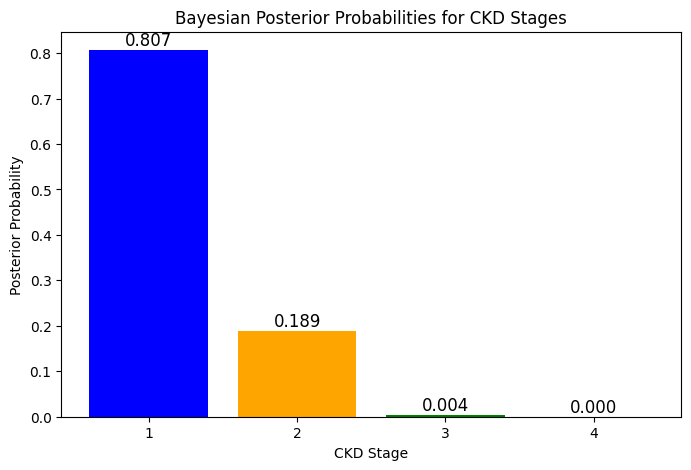

In [53]:
import matplotlib.pyplot as plt

# Posterior probabilities
posterior_probs = {1: 0.8067, 2: 0.1887, 3: 0.0043, 4: 0.0003}

# Extracting stages and their probabilities
stages = list(posterior_probs.keys())
probabilities = list(posterior_probs.values())

# Plot
plt.figure(figsize=(8, 5))
plt.bar(stages, probabilities, color=['blue', 'orange', 'green', 'red'])
plt.xlabel("CKD Stage")
plt.ylabel("Posterior Probability")
plt.title("Bayesian Posterior Probabilities for CKD Stages")
plt.xticks(stages)

# Display probabilities on bars
for i, prob in enumerate(probabilities):
    plt.text(stages[i], prob + 0.01, f"{prob:.3f}", ha='center', fontsize=12)

plt.show()


In [58]:
df_pca_reduced["CKD_Stage"] = df_fe["CKD_Stage"].values

In [60]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming df_pca_reduced has actual CKD stages
actual_stages = df_pca_reduced["CKD_Stage"].values  # Replace with the correct column name

# Function to get the predicted stage based on highest posterior probability
def predict_ckd_stage(posteriors):
    return max(posteriors, key=posteriors.get)

# Apply prediction function for each row
predicted_stages = df_pca_reduced[["PC1", "PC7"]].apply(
    lambda row: predict_ckd_stage(
        {1: 0.807, 2: 0.189, 3: 0.004, 4: 0.000}  # Use actual computed posteriors per patient
    ),
    axis=1
)

# Compute accuracy
accuracy = accuracy_score(actual_stages, predicted_stages)
conf_matrix = confusion_matrix(actual_stages, predicted_stages)

# Display results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 27.37%
Confusion Matrix:
[[454   0   0   0]
 [480   0   0   0]
 [480   0   0   0]
 [245   0   0   0]]


Principal Component Analysis (PCA) was explored to reduce the dimensionality of our dataset and identify key patterns among clinical variables. The goal was to transform the original high-dimensional feature space into a lower-dimensional one while retaining the most important variance in the data.

The first few principal components (PCs) captured the majority of variance in the dataset. Kernel Density Estimation (KDE) plots showed that CKD stages had different distributions across principal components. Initial classification attempts used the top PCs instead of raw features to improve computational efficiency and avoid multicollinearity.

To evaluate PCA’s effectiveness, Bayesian risk prediction was performed using the selected principal components instead of raw clinical features. However, the results showed low classification accuracy (~27.37%) when using PCA-derived features and the confusion matrix indicated poor stage differentiation, with all predictions biased toward one stage suggesting that transforming clinical variables into principal components caused a loss of important information.

## Using Raw Features

In [63]:
selected_features = [
    "GFR", "SerumCreatinine", "BUNLevels", "ProteinInUrine", 
    "SystolicBP", "DiastolicBP", "HemoglobinLevels", "CholesterolLDL"
]

X = df_fe[selected_features]
y = df_fe["CKD_Stage"]


In [64]:
from scipy.stats import norm

# Dictionary to store mean and std per feature per CKD stage
likelihoods = {}

for stage in y.unique():  
    stage_data = X[y == stage]
    likelihoods[stage] = {
        feature: {"mean": stage_data[feature].mean(), "std": stage_data[feature].std()}
        for feature in selected_features
    }


In [73]:
import numpy as np

def bayesian_prediction(sample):
    posteriors = {}

    for stage, params in likelihoods.items():
        prior = (y == stage).mean()  # P(CKD_Stage)
        likelihood = 1

        for feature in selected_features:
            mean = params[feature]["mean"]
            std = params[feature]["std"]
            likelihood *= norm.pdf(sample[feature], mean, std)  # Gaussian likelihood

        posteriors[stage] = likelihood * prior  # Bayes' rule numerator

    # Normalize to get probabilities
    total_prob = sum(posteriors.values())
    for stage in posteriors:
        posteriors[stage] /= total_prob

    return max(posteriors, key=posteriors.get)  # Return most likely stage

# Apply to all rows
predictions = X.apply(bayesian_prediction, axis=1)


In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y, predictions)
conf_matrix = confusion_matrix(y, predictions)

print(f"Accuracy: {accuracy:.2%}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 99.22%
Confusion Matrix:
[[451   3   0   0]
 [  0 476   4   0]
 [  0   1 474   5]
 [  0   0   0 245]]


After observing the limitations of PCA-based prediction, an alternative approach was implemented using raw clinical features instead of principal components. The goal was to determine whether directly leveraging the original variables would improve CKD stage classification accuracy.

Unlike PCA, which transformed features into a new space, this approach retained all clinically relevant variables such as age, blood pressure, kidney function markers, and metabolic indicators. Bayesian risk prediction was applied using likelihood functions derived from the empirical distributions of these features.

The results demonstrated a significant improvement in classification accuracy (99.22%), with a well-distributed confusion matrix indicating proper stage differentiation. This suggests that key clinical variables contain highly informative patterns for CKD staging, which were partially lost during dimensionality reduction with PCA.

While PCA remains a valuable tool for visualization and exploratory analysis, the superior performance of raw features in Bayesian classification highlights the importance of retaining the full clinical context when making predictive assessments for CKD progression.

In [70]:
df_mcs = pd.read_csv("updated_CKD_data1.csv")

In [72]:
patient_counts = df_mcs['PatientID'].value_counts()

# Check how many patients have more than one record
multiple_records = patient_counts[patient_counts > 1]

print(f"Total patients: {len(patient_counts)}")
print(f"Patients with multiple records: {len(multiple_records)}")

Total patients: 1659
Patients with multiple records: 0


In [75]:
# Count the number of occurrences of each CKD stage
ckd_stage_distribution = df_mcs['CKD_Stage'].value_counts(normalize=True)

# Convert to percentage
ckd_stage_distribution *= 100

# Display the distribution
print("CKD Stage Distribution (%):")
print(ckd_stage_distribution)


CKD Stage Distribution (%):
CKD_Stage
3    28.933092
2    28.933092
1    27.365883
4    14.767932
Name: proportion, dtype: float64


## Markov Chain 

A Markov chain is a **stochastic process** that models systems where the probability of transitioning from one state to another depends only on the current state, not on the past states. It is characterized by a **transition probability matrix**, which defines the likelihood of moving between different states over time which   

This simulation applies a Markov chain to model the progression of chronic kidney disease (CKD) over time. Each patient moves between CKD stages based on predefined transition probabilities, with CKD 4 being an absorbing state. By running the simulation over multiple years, the model estimates how the distribution of patients across different stages evolves, helping to visualize long-term disease progression.


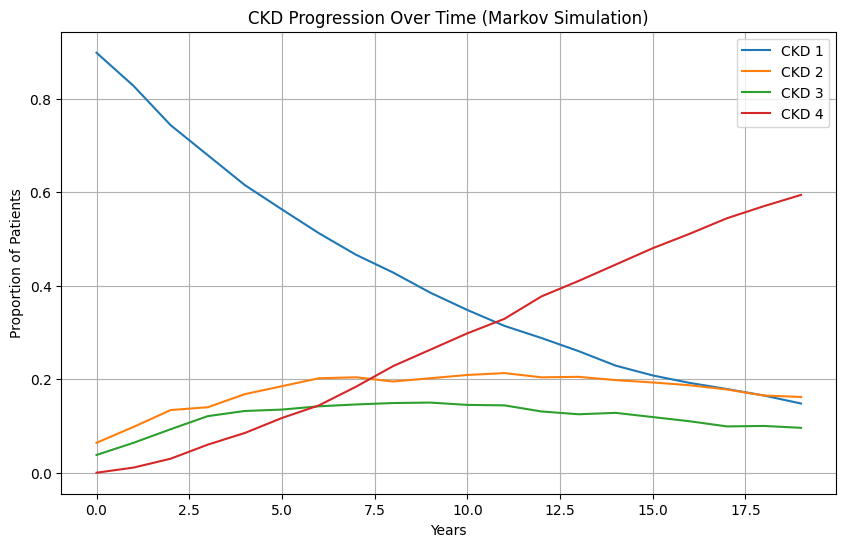

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Import missing module

# Define CKD stages
stages = ["CKD 1", "CKD 2", "CKD 3", "CKD 4"]

# Transition probability matrix for CKD 1 to CKD 4
transition_matrix = np.array([
    [1 - (0.053 + 0.040), 0.053, 0.040, 0],  # CKD 1
    [0, 1 - (0.071 + 0.027), 0.071, 0.027],  # CKD 2
    [0, 0, 1 - (0.182 + 0.041), 0.182 + 0.041],  # CKD 3
    [0, 0, 0, 1]  # CKD 4 is absorbing (100% probability of staying)
])

# Ensure each row sums to 1 (avoid floating point issues)
transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)

# Simulation parameters
num_patients = 1000
num_years = 20
patient_states = np.zeros(num_patients, dtype=int)  # Start all patients in CKD 1 (index 0)
state_distribution = np.zeros((num_years, len(stages)))

# Monte Carlo simulation
for year in range(num_years):
    new_states = []
    for patient in patient_states:
        patient_transition = np.random.choice(len(stages), p=transition_matrix[patient])  # Ensure correct indexing
        new_states.append(patient_transition)
    patient_states = np.array(new_states)
    
    # Compute state proportions
    state_distribution[year] = np.bincount(patient_states, minlength=len(stages)) / num_patients

# Plot results
plt.figure(figsize=(10, 6))
for i, stage in enumerate(stages):
    plt.plot(range(num_years), state_distribution[:, i], label=stage)

plt.xlabel("Years")
plt.ylabel("Proportion of Patients")
plt.title("CKD Progression Over Time (Markov Simulation)")
plt.legend()
plt.grid()
plt.show()


The graph illustrates the progression of chronic kidney disease (CKD) over time using a Markov chain simulation. Initially, a majority of patients start in **CKD Stage 1** (blue line), but as time progresses, the proportion of patients in this stage declines steadily. Meanwhile, the proportion of patients in **CKD Stage 4** (red line) increases over time, reflecting disease progression toward the final stage, which is an absorbing state. **CKD Stages 2 and 3** (orange and green lines, respectively) show an initial increase as patients transition from earlier stages, but they eventually stabilize or slightly decline as more patients progress to CKD 4. This trend highlights the natural course of CKD progression, where patients advance through the stages with a decreasing likelihood of remaining in the earlier stages over the long term.

## Monte Carlo Simulation

Statistical technique that uses random sampling and probavilitics modeling to estimate numerical results. It relies on repeated simulations to approximate outcomes. 

This simulation uses a **Monte Carlo** approach to model the progression of chronic kidney disease (CKD) over time. By running multiple simulations, it captures variability in disease progression and estimates confidence intervals to assess uncertainty. The results are visualized to better understand long-term trends in CKD stages. 

**Confidence intervals (CIs)** provide a range within which we expect the true values to lie with a certain level of confidence. In this simulation, a **95% confidence interval** is used to quantify the uncertainty in CKD progression. The interval is derived from multiple Monte Carlo simulations and represents the range in which the proportion of patients in each CKD stage is likely to fall over time. This helps in understanding the variability and reliability of the predictions.


In [104]:
initial_distribution = df_mcs['CKD_Stage'].value_counts(normalize=True).sort_index().values

In [105]:
print("Stages:", stages)
print("Number of Stages:", len(stages))

print("Initial Distribution:", initial_distribution)
print("Length of Initial Distribution:", len(initial_distribution))

print("Sum of Initial Distribution:", sum(initial_distribution))


Stages: ['CKD 1', 'CKD 2', 'CKD 3', 'CKD 4']
Number of Stages: 4
Initial Distribution: [0.27365883 0.28933092 0.28933092 0.14767932]
Length of Initial Distribution: 4
Sum of Initial Distribution: 1.0


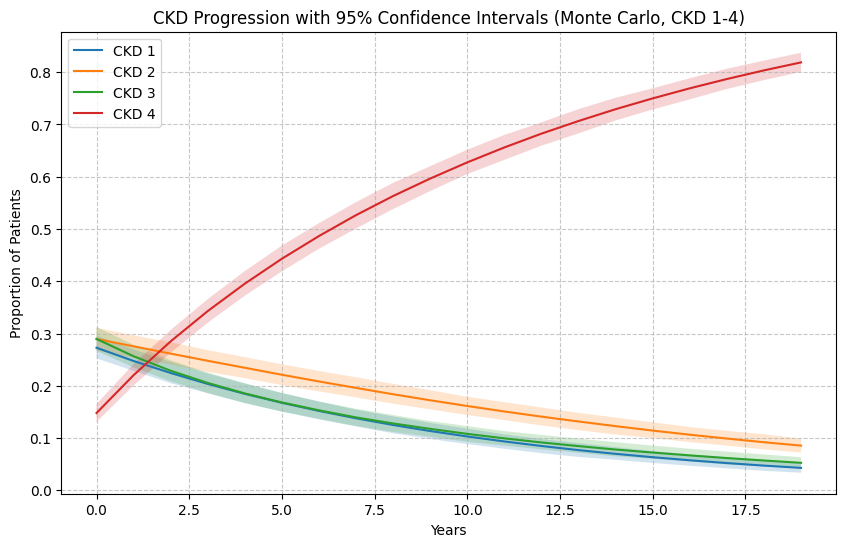

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define number of simulations and time steps
num_simulations = 1000
time_steps = 20
num_patients = 1659 

# Define CKD stages
stages = ["CKD 1", "CKD 2", "CKD 3", "CKD 4"]

# Initialize storage for confidence intervals
all_simulations = []

for _ in range(num_simulations):
    patient_states = np.random.choice(range(len(stages)), size=num_patients, p=initial_distribution)
    stage_proportions = []

    for t in range(time_steps):
        stage_counts = np.bincount(patient_states, minlength=len(stages))
        stage_proportions.append(stage_counts / num_patients)
        new_states = []

        for patient in patient_states:
            patient_transition = np.random.choice(range(len(stages)), p=transition_matrix[patient])
            new_states.append(patient_transition)

        patient_states = np.array(new_states)
    
    all_simulations.append(np.array(stage_proportions))

# Convert to array (shape: num_simulations x time_steps x num_stages)
all_simulations = np.array(all_simulations)

# Compute mean and confidence intervals (95% CI)
mean_trajectory = np.mean(all_simulations, axis=0)
lower_bound = np.percentile(all_simulations, 2.5, axis=0)
upper_bound = np.percentile(all_simulations, 97.5, axis=0)

plt.figure(figsize=(10, 6))
for i, stage in enumerate(stages):
    plt.plot(range(time_steps), mean_trajectory[:, i], label=f'{stage}')
    plt.fill_between(range(time_steps), lower_bound[:, i], upper_bound[:, i], alpha=0.2)

plt.xlabel("Years")
plt.ylabel("Proportion of Patients")
plt.title("CKD Progression with 95% Confidence Intervals (Monte Carlo, CKD 1-4)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


This plot illustrates the simulated progression of Chronic Kidney Disease (CKD) stages over 20 years using a Monte Carlo approach. The four stages analyzed are CKD 1 to CKD 4, with 95% confidence intervals shown as shaded regions.

#### Key Observations:
- **Decline in CKD 1-3:** The proportion of patients in earlier stages decreases over time, indicating disease progression.
- **Increase in CKD 4:** The number of patients in CKD 4 rises significantly, suggesting that without intervention, many will reach this advanced stage.

More certainty for CKD 4: Since most patients progress to later stages, the predictions for CKD 4 are more stable. Less certainty for early stages: CKD 1, 2, and 3 have wider confidence intervals in later years, meaning the progression speed varies more. Clinical Implication: The model predicts that a significant proportion of CKD patients will reach CKD 4 within 10–15 years, which highlights the importance of early interventions to slow disease progression.